In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change.
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded.
%autoreload 2

# Смена рабочей папки.
%cd ..

d:\coding\text-proc-ml


In [ ]:
!git clone https://github.com/Samsung-IT-Academy/stepik-dl-nlp.git && pip install -r stepik-dl-nlp/requirements.txt

In [8]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import collections

import torch
from torch import nn
from torch.nn import functional as F

# https://github.com/sic-rus-ai/stepik-dl-nlp/
import dlnlputils
from dlnlputils.data import tokenize_text_simple_regex, tokenize_corpus, build_vocabulary, \
    vectorize_texts, SparseFeaturesDataset
from dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed

init_random_seed()


# Data preparation

In [9]:
train_source = fetch_20newsgroups(subset="train")
test_source = fetch_20newsgroups(subset="test")

print("Train corpus len", len(train_source["data"]))
print("Test corpus len", len(test_source["data"]))
print(train_source["data"][0].strip())

print("Mark", train_source["target"][0])

Train corpus len 11314
Test corpus len 7532
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----

Метка 7


In [10]:
train_source.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [18]:
for key in train_source.keys():
    print(f"{key}:")
    print(train_source[key][0])
    print("===")

data:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





===
filenames:
C:\Users\nonam\scikit_learn_data\20news_home\20news-bydate-train\rec.autos\102994
===
target_names:
alt.atheism
===
target:
7
===
DESCR:
.
===


## Features

In [20]:
train_tokenized = tokenize_corpus(train_source["data"])
test_tokenized = tokenize_corpus(test_source["data"])

print("|".join(train_tokenized[0]))

from|lerxst|where|thing|subject|what|this|nntp|posting|host|rac3|organization|university|maryland|college|park|lines|wondering|anyone|there|could|enlighten|this|other|door|sports|looked|from|late|early|called|bricklin|doors|were|really|small|addition|front|bumper|separate|from|rest|body|this|know|anyone|tellme|model|name|engine|specs|years|production|where|this|made|history|whatever|info|have|this|funky|looking|please|mail|thanks|brought|your|neighborhood|lerxst


In [29]:
MAX_DF = 0.8
MIN_COUNT = 5
vocabulary, word_doc_freq = build_vocabulary(
    train_tokenized, max_doc_freq=MAX_DF, min_count=MIN_COUNT
)
UNIQUE_WORDS_N = len(vocabulary)
print("Количество уникальных токенов", UNIQUE_WORDS_N)
print(list(vocabulary.items())[:10])

Количество уникальных токенов 21628
[('that', 0), ('this', 1), ('have', 2), ('with', 3), ('writes', 4), ('article', 5), ('posting', 6), ('host', 7), ('nntp', 8), ('there', 9)]


In [33]:
word_doc_freq.shape

(21628,)

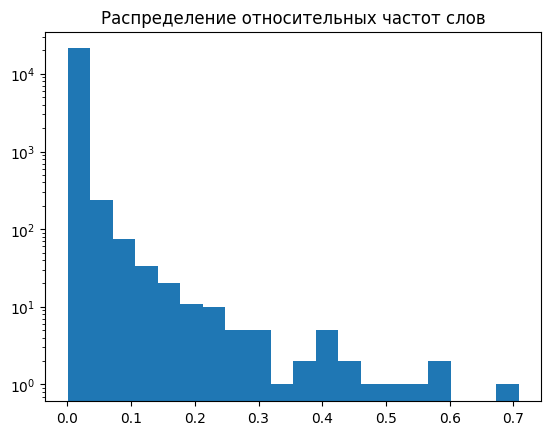

In [34]:
plt.hist(word_doc_freq, bins=20)
plt.title("Распределение относительных частот слов")
plt.yscale("log")